<a href="https://colab.research.google.com/github/Iman6243/AI/blob/main/MobilSENSOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clear All Variables

In [ ]:
%reset -f
#del my_variable

# unsupervisor ML

## پیش‌پردازش و استخراج ویژگی‌ها:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# فرض کنید که داده‌های سنسورها را در یک فایل CSV جمع‌آوری کرده‌اید
data = pd.read_csv('Accelerometer.csv')
# انتخاب ویژگی‌ها
features= ['x', 'y', 'z']
x=data[features]
# نرمال‌سازی داده‌ها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# استخراج ویژگی‌های آماری
def extract_features(row):
  features = []
  for i in range(row.shape[0]):
    mean = np.mean(row[i])
    std = np.std(row[i])
    max_val = np.max(row[i])
    min_val = np.min(row[i])
    features.extend([mean, std, max_val, min_val])
  return np.array(features)
# اعمال تابع extract_features به هر ستون
#X_features = np.apply_along_axis(extract_features, 1, X_scaled)
X_features = np.apply_along_axis(lambda row: extract_features(row.reshape(1, -1)), 1, X_scaled)
 # اطمینان از مطابقت طول‌ها
print(X_features.shape)
print(x.shape)
#print(len(X_features))
#print(len(data))

(1730, 4)
(1730, 3)


## اجرای مدل K-Means:

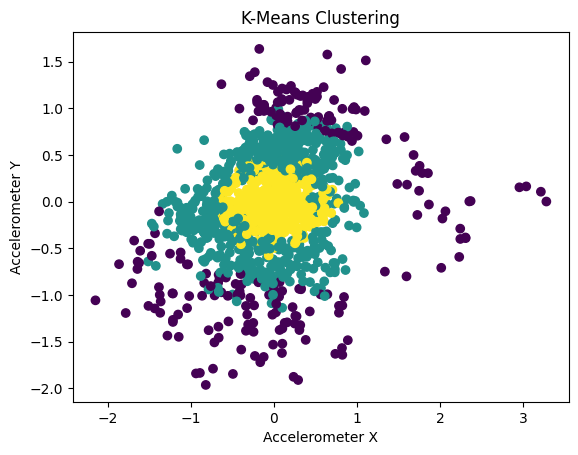

                 time  seconds_elapsed         z         y         x
cluster                                                             
0        1.734021e+18        11.385845  0.487881 -0.179640  0.134974
1        1.734021e+18        10.530637  0.035058  0.019229 -0.099971
2        1.734021e+18         6.924139  0.140871 -0.021268 -0.020722


In [ ]:
from sklearn.cluster import KMeans

# استفاده از الگوریتم K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # تعداد کلاسترها را مشخص کنید
kmeans.fit(X_features)

# افزودن نتایج کلاسترینگ به داده‌ها
data['cluster'] = kmeans.labels_

# نمایش نتایج
import matplotlib.pyplot as plt
plt.scatter(data['x'], data['y'], c=data['cluster'])
plt.xlabel('Accelerometer X')
plt.ylabel('Accelerometer Y')
plt.title('K-Means Clustering')
plt.show()

# بررسی ویژگی‌های هر کلاستر
print(data.groupby('cluster').mean())



## اجرای مدل DBSCAN:

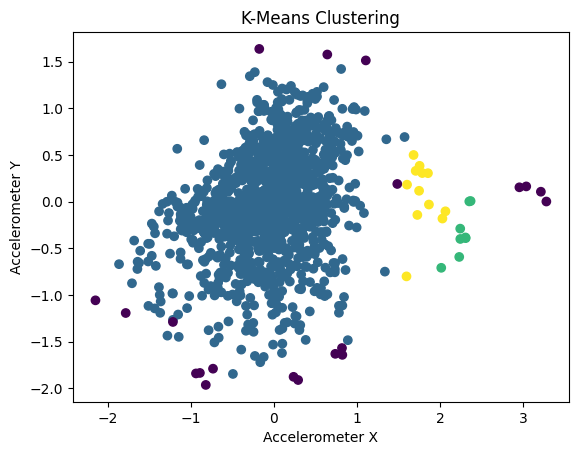

                 time  seconds_elapsed         z         y         x
cluster                                                             
-1       1.734021e+18        10.729379  1.680002 -0.713840  0.496782
 0       1.734021e+18         8.874888  0.129552 -0.018579 -0.059034
 1       1.734021e+18         4.062662  0.828219 -0.345265  2.257364
 2       1.734021e+18         5.092076 -0.225453  0.071450  1.784061


In [ ]:
from sklearn.cluster import DBSCAN

# استفاده از الگوریتم DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_features)

# افزودن نتایج کلاسترینگ به داده‌ها
data['cluster'] = clusters

# نمایش نتایج
plt.scatter(data['x'], data['y'], c=data['cluster'])
plt.xlabel('Accelerometer X')
plt.ylabel('Accelerometer Y')
plt.title('K-Means Clustering')
plt.show()

# بررسی ویژگی‌های هر کلاستر
print(data.groupby('cluster').mean())


## اجرای مدل Hierarchical Clustering:

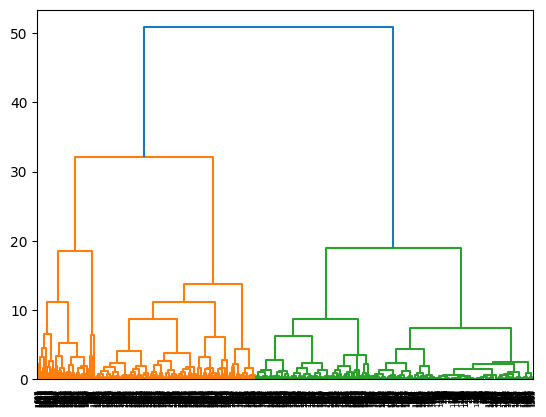

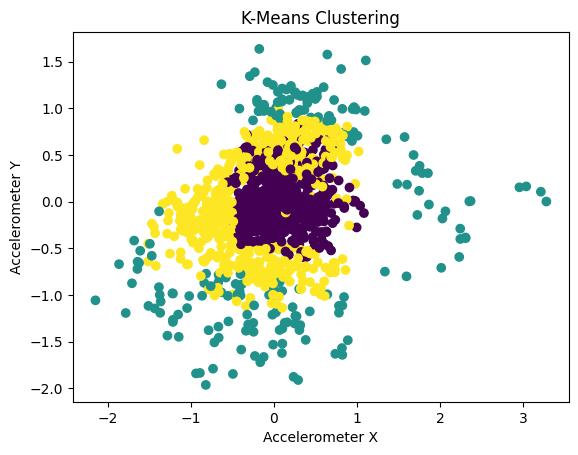

                 time  seconds_elapsed         z         y         x
cluster                                                             
0        1.734021e+18         7.447190  0.111139  0.002818  0.038998
1        1.734021e+18        11.260676  0.577032 -0.207888  0.166987
2        1.734021e+18        10.408457  0.060392 -0.015910 -0.215987


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# استفاده از الگوریتم Hierarchical Clustering
linked = linkage(X_features, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

# اجرای مدل Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clusters = hc.fit_predict(X_features)

# افزودن نتایج کلاسترینگ به داده‌ها
data['cluster'] = clusters

# نمایش نتایج
plt.scatter(data['x'], data['y'], c=data['cluster'])
plt.xlabel('Accelerometer X')
plt.ylabel('Accelerometer Y')
plt.title('K-Means Clustering')
plt.show()

# بررسی ویژگی‌های هر کلاستر
print(data.groupby('cluster').mean())


## کد تحلیل الگوها

In [ ]:
# تحلیل الگوهای هر کلاستر
clusters = data['cluster'].unique()

for cluster in clusters:
    cluster_data = data[data['cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(cluster_data.describe())


## کد برای کلاسترینگ و ایجاد برچسب‌های اولیه

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# استفاده از الگوریتم K-Means برای کلاسترینگ
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
data['pseudo_labels'] = kmeans.labels_

# استفاده از برچسب‌های اولیه برای آموزش مدل نظارتی
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data['pseudo_labels'], test_size=0.2, random_state=42)

# آموزش مدل Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ارزیابی مدل
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.07189479768786126
سه مقدار شتاب  بترتیب در راستای محورهای طول و عرض و ارتفاع وارد کنید: 55,26,87
Prediction: [1.68]


### Prediction

In [ ]:
# پیش‌بینی با داده جدید
#new_data = np.array([[accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, magnet_x, magnet_y, magnet_z]])
accel_x, accel_y, accel_z = eval(input("سه مقدار شتاب بترتیب در راستای محورهای طول و عرض و ارتفاع وارد کنید: "))
new_data = np.array([[accel_x, accel_y, accel_z]])
new_data_scaled = scaler.transform(new_data)
new_prediction = model.predict(new_data_scaled)
print(f"Prediction: {new_prediction}")

## LSTM برای تحلیل داده‌های سری زمانی

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# تبدیل داده‌ها به توالی‌های سری زمانی
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)
    return np.array(sequences)

seq_length = 10  # طول توالی‌ها
X_sequences = create_sequences(X_scaled, seq_length)

# استفاده از الگوریتم K-Means برای کلاسترینگ و ایجاد برچسب‌های اولیه
kmeans = KMeans(n_clusters=5, random_state=42)
pseudo_labels = kmeans.fit_predict(X_scaled)

# همگام‌سازی برچسب‌ها با توالی‌ها
y_sequences = pseudo_labels[seq_length:]

# ایجاد مدل LSTM
model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, X_sequences.shape[2]), return_sequences=True))
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # خروجی مدل براساس تعداد کلاسترها یا برچسب‌های اولیه

# کامپایل کردن مدل
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# آموزش مدل
model.fit(X_sequences, y_sequences, epochs=50, batch_size=32, validation_split=0.2)

# ارزیابی مدل
loss, mae = model.evaluate(X_sequences, y_sequences)
print(f'Mean Absolute Error: {mae}')

# پیش‌بینی با داده جدید
new_data = np.array([X_scaled[-seq_length:]])
prediction = model.predict(new_data)
print(f'Prediction: {prediction}')


-10

# Signal Processing

In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from sklearn.preprocessing import StandardScaler

In [ ]:
# فرض کنید که داده‌های شتاب‌سنج را در یک فایل CSV جمع‌آوری کرده‌اید
data = pd.read_csv('ACCL-Test.csv')

# انتخاب ویژگی‌ها
features = ['x', 'y', 'z']

X = data[features]

# نرمال‌سازی داده‌ها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# استخراج قله‌ها برای هر محور شتاب‌سنج
def extract_peaks(axis_data):
    peaks, _ = find_peaks(axis_data, height=0)
    return peaks

peaks_x = extract_peaks(X_scaled[:, 0])
peaks_y = extract_peaks(X_scaled[:, 1])
peaks_z = extract_peaks(X_scaled[:, 2])

# ساخت داده‌های ویژگی براساس قله‌ها
def create_feature_data(peaks, axis_data):
    features = []
    for peak in peaks:
        feature = {'peak_value': axis_data[peak],'peak_distance': np.mean(np.diff(peaks))}
        features.append(feature)
    return features

features_x = create_feature_data(peaks_x, X_scaled[:, 0])
features_y = create_feature_data(peaks_y, X_scaled[:, 1])
features_z = create_feature_data(peaks_z, X_scaled[:, 2])

# تبدیل داده‌های ویژگی به DataFrame
df_features = pd.DataFrame(features_x + features_y + features_z)

# آماده‌سازی داده‌ها برای مدلسازی
X_features = df_features.values
y_features = np.zeros(X_features.shape[0])  # فرض کنید برچسب‌های اولیه برای آموزش LSTM

In [ ]:
##df_f = pd.DataFrame([{'peak_value': 1,'peak_distance': 2},{'peak_value': 3,'peak_distance': 4}]+[{'peak_value': -1,'peak_distance': -2},{'peak_value': -3,'peak_distance': -4}]+[{'peak_value': 5,'peak_distance': 6},{'peak_value': 7,'peak_distance': 8}])
##X_f = df_f.values
# آماده‌سازی داده‌ها برای مدلسازی
##print(df_f)
##print(df_f.values)
##print(df_f.shape[1] )
##X_f = X_f.reshape((X_f.shape[0], 1, X_f.shape[1]))
##X_f.shape

(6, 1, 2)

In [ ]:
# ساخت و آموزش مدل LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# تغییر شکل داده‌ها برای LSTM
X_features = X_features.reshape((X_features.shape[0], 1, X_features.shape[1]))

# ایجاد مدل LSTM
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_features.shape[2]), return_sequences=True))
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# کامپایل کردن مدل
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# آموزش مدل
model.fit(X_features, y_features, epochs=50, batch_size=32, validation_split=0.2)

# ارزیابی مدل
loss, mae = model.evaluate(X_features, y_features)
print(f'Mean Absolute Error: {mae}')

IndexError: tuple index out of range

In [ ]:
# پیش‌بینی با داده جدید
peak_value=1.19969738746217
peak_distance=6.666666666666667
new_data = np.array([[peak_value, peak_distance]])
new_data = new_data.reshape((new_data.shape[0], 1, new_data.shape[1]))

prediction = model.predict(new_data)
print(f'Prediction: {prediction}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
Prediction: [[4.138396e-05]]


# Manipulation-Sensors

In [ ]:
import socket
hostname = socket.gethostname()
print(socket.gethostbyname(hostname))

In [ ]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv('Accelerometer.csv')
df.index = pd.to_datetime(df['time'], unit = 'ns')

fig = go.Figure()

for axis in ['x', 'y', 'z']:
    fig.add_trace(go.Scatter(x = df.index, y = df[axis], name = axis))

fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv('Gravity.csv')
df.index = pd.to_datetime(df['time'], unit='ns')

fig = go.Figure()

for axis in ['x', 'y', 'z']:
    fig.add_trace(go.Scatter(x = df.index, y = df[axis], name = axis))

fig.show()

In [ ]:
import folium
import pandas as pd

df = pd.read_csv("Location.csv")
coords = [(row.latitude, row.longitude) for _, row in df.iterrows()]

my_map = folium.Map(location=[df.latitude.mean(), df.longitude.mean()], zoom_start=16)
folium.PolyLine(coords, color="blue", weight=5.0).add_to(my_map)

In [ ]:
!pip install dash

In [ ]:
import dash
from dash.dependencies import Output, Input
from dash import dcc, html, dcc
from datetime import datetime
import json
import plotly.graph_objs as go
from collections import deque
from flask import Flask, request

server = Flask(__name__)
app = dash.Dash(__name__, server=server)

MAX_DATA_POINTS = 1000
UPDATE_FREQ_MS = 100

time = deque(maxlen=MAX_DATA_POINTS)
accel_x = deque(maxlen=MAX_DATA_POINTS)
accel_y = deque(maxlen=MAX_DATA_POINTS)
accel_z = deque(maxlen=MAX_DATA_POINTS)

app.layout = html.Div(
	[
		dcc.Markdown(
			children="""
			# Live Sensor Readings
			Streamed from Sensor Logger: tszheichoi.com/sensorlogger
		"""
		),
		dcc.Graph(id="live_graph"),
		dcc.Interval(id="counter", interval=UPDATE_FREQ_MS),
	]
)


@app.callback(Output("live_graph", "figure"), Input("counter", "n_intervals"))
def update_graph(_counter):
	data = [
		go.Scatter(x=list(time), y=list(d), name=name)
		for d, name in zip([accel_x, accel_y, accel_z], ["X", "Y", "Z"])
	]

	graph = {
		"data": data,
		"layout": go.Layout(
			{
				"xaxis": {"type": "date"},
				"yaxis": {"title": "Acceleration ms<sup>-2</sup>"},
			}
		),
	}
	if (
		len(time) > 0
	):  #  cannot adjust plot ranges until there is at least one data point
		graph["layout"]["xaxis"]["range"] = [min(time), max(time)]
		graph["layout"]["yaxis"]["range"] = [
			min(accel_x + accel_y + accel_z),
			max(accel_x + accel_y + accel_z),
		]

	return graph


@server.route("/data", methods=["POST"])
def data():  # listens to the data streamed from the sensor logger
	if str(request.method) == "POST":
		print(f'received data: {request.data}')
		data = json.loads(request.data)
		for d in data['payload']:
			if (
				d.get("name", None) == "accelerometer"
			):  #  modify to access different sensors
				ts = datetime.fromtimestamp(d["time"] / 1000000000)
				if len(time) == 0 or ts > time[-1]:
					time.append(ts)
					# modify the following based on which sensor is accessed, log the raw json for guidance
					accel_x.append(d["values"]["x"])
					accel_y.append(d["values"]["y"])
					accel_z.append(d["values"]["z"])
	return "success"


if __name__ == "__main__":
	app.run_server(port=8000, host="0.0.0.0")


In [ ]:
 # https://stumpy.readthedocs.io/en/latest/
!pip install stumpy

In [ ]:
import stumpy
import numpy as np

if __name__ == "__main__":
    your_time_series = np.random.rand(10000)
    window_size = 50  # Approximately, how many data points might be found in a pattern

    matrix_profile = stumpy.stump(your_time_series, m=window_size)

subseq_len = 50
correct_arc_curve, regime_locations = stumpy.fluss(matrix_profile[:, 1],L=subseq_len,n_regimes=2,excl_factor=1)

In [ ]:
# https://towardsdatascience.com/a-brief-introduction-to-time-series-classification-algorithms-7b4284d31b97
# https://github.com/sktime/sktime
!pip install sktime

In [ ]:
!pip install  sktime-dl
!pip install sktime[all_extras]

# Find Prime

In [ ]:
def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

def print_primes(n, current=None):
    if current is None:
        current = n
    if current < 0:
        return
    if is_prime(current):
        print(current)
    print_primes(n, current - 1)

# ورودی عدد صحیح
number = int(input("یک عدد صحیح وارد کنید: "))
print_primes(number)


In [ ]:
def count_sequences(lst, index=0, char=None, count=0):
    if index == len(lst):  # Base case: end of the list
        if char is not None:
            print(f"{char}: {count}")
        return

    if lst[index] == char:
        count_sequences(lst, index + 1, char, count + 1)
    else:
        if char is not None:
            print(f"{char}: {count}")
        count_sequences(lst, index + 1, lst[index], 1)


# Example usage:
characters = ['a', 'a', 'b', 'b', 'b', 'c', 'a', 'a', 'd', 'd', 'd', 'd']
count_sequences(characters)

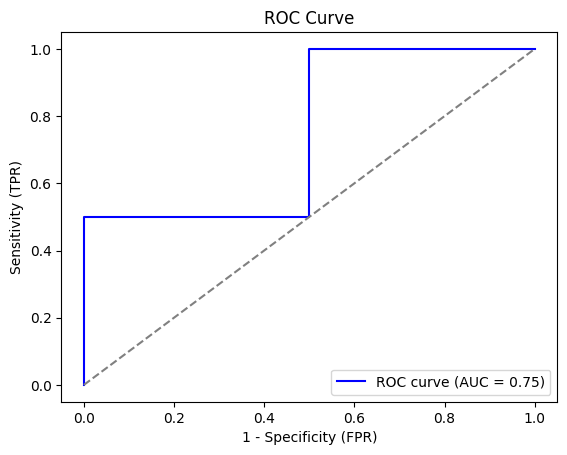

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# مقادیر واقعی و پیش‌بینی
y_true = [0, 0, 1, 1]
y_scores = [0.2, 0.5, 0.35, 0.8]

# محاسبه حساسیت و 1-اختصاصی‌بودن
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# محاسبه AUC
roc_auc = auc(fpr, tpr)

# رسم نمودار ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('1 - Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
